In [60]:
import pandas as pd
df=pd.read_csv('E:\data\data.csv',sep=';')
df.head()

,no,bulan,pemasukan,desa_katukobari,desa_morikana,desa lakorua,desa_lantongau,jumlah_pengguna,uang_langganan,volume
0,1,Oct-19,43.316.000,139,355,459,370,1323,9.26 1.000,11352
1,2,Nov-19,49.509.000,139,355,459,370,1323,9.26 1.000,13416
2,3,Des-19,42.585.000,139,355,459,370,1323,9.26 1.000,11108
3,4,Jan-20,42.235.000,139,355,459,371,1324,9.268.000,10989
4,5,Feb-20,37.093.000,139,355,459,371,1324,9.268.000,9275


In [61]:
df.dtypes

no                  int64
bulan              object
pemasukan          object
desa_katukobari     int64
desa_morikana       int64
desa lakorua        int64
desa_lantongau      int64
jumlah_pengguna     int64
uang_langganan     object
volume              int64
dtype: object

In [62]:
df.columns

Index(['no', 'bulan', 'pemasukan', 'desa_katukobari', 'desa_morikana',
       'desa lakorua', 'desa_lantongau', 'jumlah_pengguna', 'uang_langganan',
       'volume'],
      dtype='object')

In [63]:
df.shape

(40, 10)

In [64]:
(df[df.isnull().any(axis=1)])

,no,bulan,pemasukan,desa_katukobari,desa_morikana,desa lakorua,desa_lantongau,jumlah_pengguna,uang_langganan,volume


In [65]:
data=pd.DataFrame(df['volume'])
data['date'] = pd.date_range(start='10/1/2019', periods=len(data), freq='MS')
data.head()

,volume,date
0,11352,2019-10-01
1,13416,2019-11-01
2,11108,2019-12-01
3,10989,2020-01-01
4,9275,2020-02-01


In [66]:
data.describe()

,volume
count,40.000000
mean,10837.000000
std,1109.076146
min,9084.000000
25%,9999.250000
50%,10818.500000
75%,11424.000000
max,13416.000000


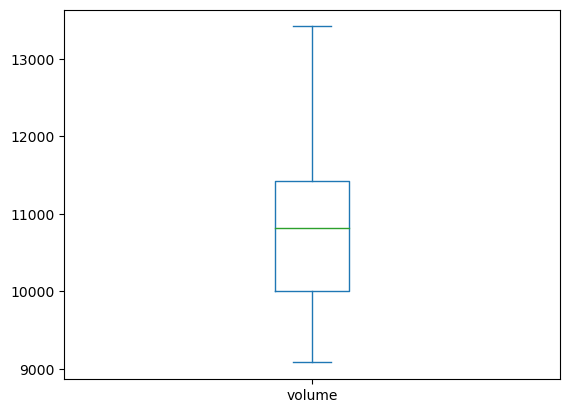

In [67]:
import matplotlib.pyplot as plt
data.plot.box()
plt.show()

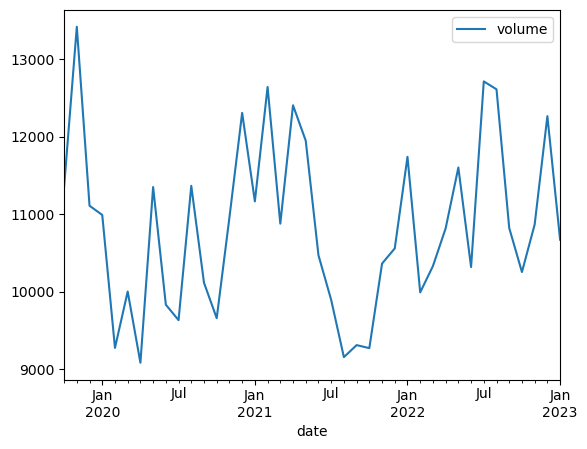

In [68]:
data.plot(x='date',y='volume')
plt.show()

In [70]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(data['volume'])
print('ADF Statistic:', adf[0])
print('p-value:', adf[1])
if isinstance(adf[4], dict):
    for key, value in adf[4].items():
        print('\t', key, ':', value)
else:
    print('\t', adf[4])

ADF Statistic: -4.196560432141196
p-value: 0.0006677895635190282
	 1% : -3.6699197407407405
	 5% : -2.9640707407407407
	 10% : -2.621171111111111


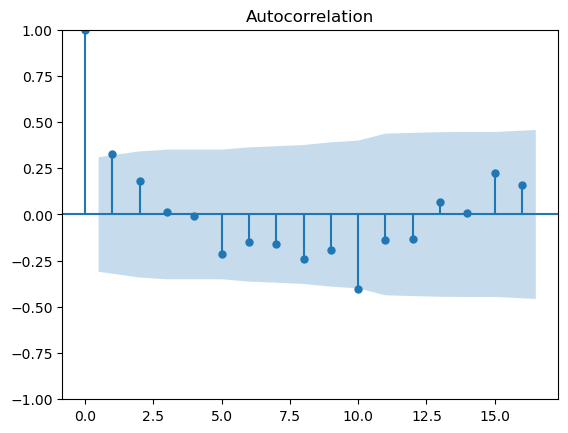

In [56]:
from statsmodels.tsa.api import acf, graphics
# Menghitung ACF
lags = acf(data['volume'])
# Membuat plot ACF
graphics.plot_acf(data['volume'], lags=range(len(lags)))
# Menampilkan plot
plt.show()

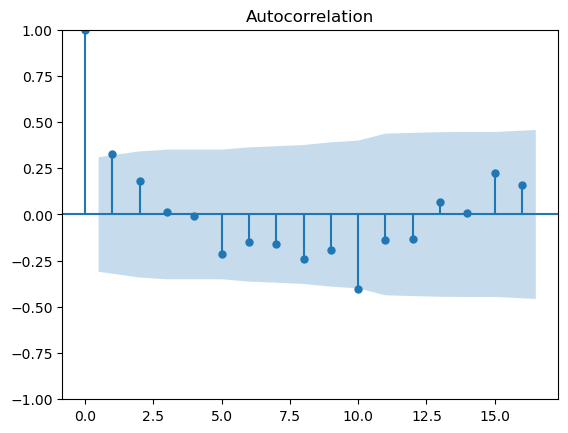

In [57]:
from statsmodels.tsa.api import pacf, graphics
# Menghitung PACF
lags = pacf(data['volume'])

# Membuat plot PACF
graphics.plot_acf(data['volume'], lags=range(len(lags)))

# Menampilkan plot
plt.show()

In [51]:
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
# Konversi DataFrame ke dalam format deret waktu
data=pd.DataFrame(data['volume'])
data['date'] = pd.date_range(start='10/1/2019', periods=len(data), freq='MS')
data.set_index('date', inplace=True)
data = df['volume']

# Definisikan daftar nilai p, d, dan q yang ingin diuji
p_values = range(0, 4)  # Misalnya, nilai p dapat berada dalam rentang 0 hingga 2
d_values = range(0, 3)  # Misalnya, nilai d dapat berada dalam rentang 0 hingga 1
q_values = range(0, 4)  # Misalnya, nilai q dapat berada dalam rentang 0 hingga 2

# Inisialisasi variabel dengan nilai awal yang tinggi
best_aic = float("inf")
best_order = None

# Iterasi melalui kombinasi nilai p, d, dan q
for p in p_values:
    for d in d_values:
        for q in q_values:
            # Membuat model ARIMA dengan kombinasi nilai p, d, dan q
            model = ARIMA(data, order=(p, d, q))
            try:
                # Melatih model ARIMA
                model_fit = model.fit()

                # Menghitung nilai AIC
                aic = model_fit.aic

                # Memperbarui nilai terbaik jika AIC lebih baik
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)

            except:
                continue

# Menampilkan kombinasi nilai p, d, dan q terbaik
print("Best Order (p, d, q):", best_order)
print("Best AIC:", best_aic)


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\anaconda3\lib\site-packages\statsmode

Best Order (p, d, q): (1, 1, 1)
Best AIC: 668.2403783276316


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [138]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['volume'], order=(1, 1, 1))
model_fit=model.fit()
predictions = model_fit.predict(steps=len(data))

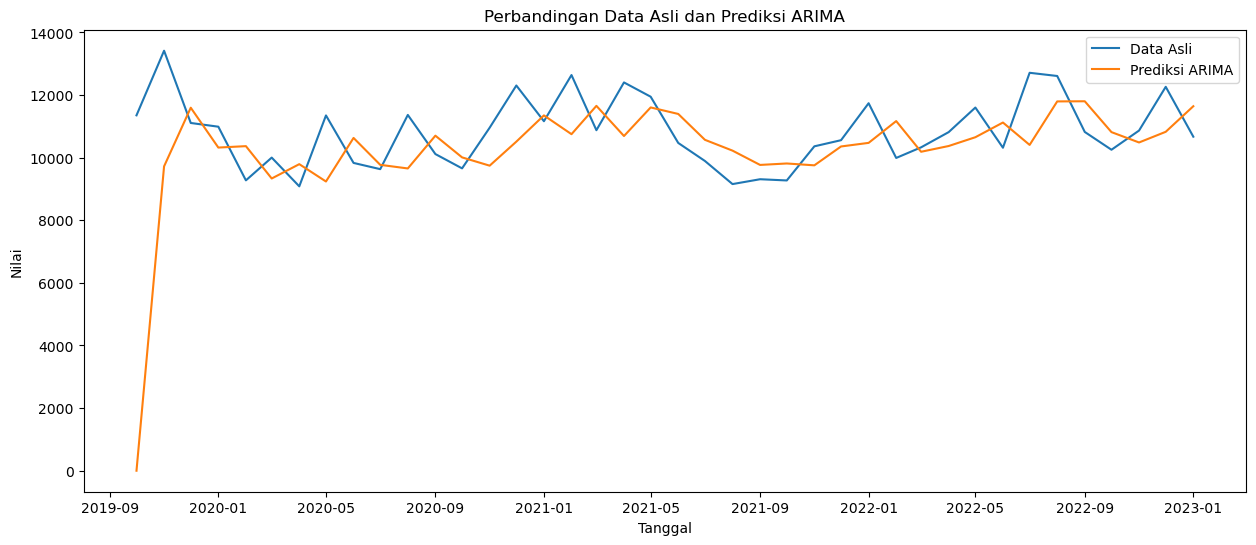

In [185]:
plt.figure(figsize=(15, 6))
plt.plot(data['date'], data['volume'], label='Data Asli')
plt.plot(data['date'], predictions, label='Prediksi ARIMA')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.title('Perbandingan Data Asli dan Prediksi ARIMA')
plt.legend()
plt.show()

In [142]:
model=ARIMA(data['volume'],order=(1,1,1))
model_fit=model.fit()
forecast=model_fit.get_forecast(steps=5)
ramal=forecast.predicted_mean
ci= forecast.conf_int()

In [160]:
ramal,ci

(<statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper at 0x28784177160>,
 40    10758.147765
 41    10803.344358
 42    10826.518308
 43    10838.400443
 44    10844.492849
 Name: predicted_mean, dtype: float64,
     lower volume  upper volume
 40   8602.361549  12913.933982
 41   8308.421551  13298.267164
 42   8208.204467  13444.832149
 43   8161.393250  13515.407635
 44   8132.219923  13556.765775)